Sales Analysis 


Overview :
this notebook used for analysing and answering business consentrates about 24 months of sales data , each data file contains a pproduct, order date , Order ID , Price for each item and the address of the electronic store . 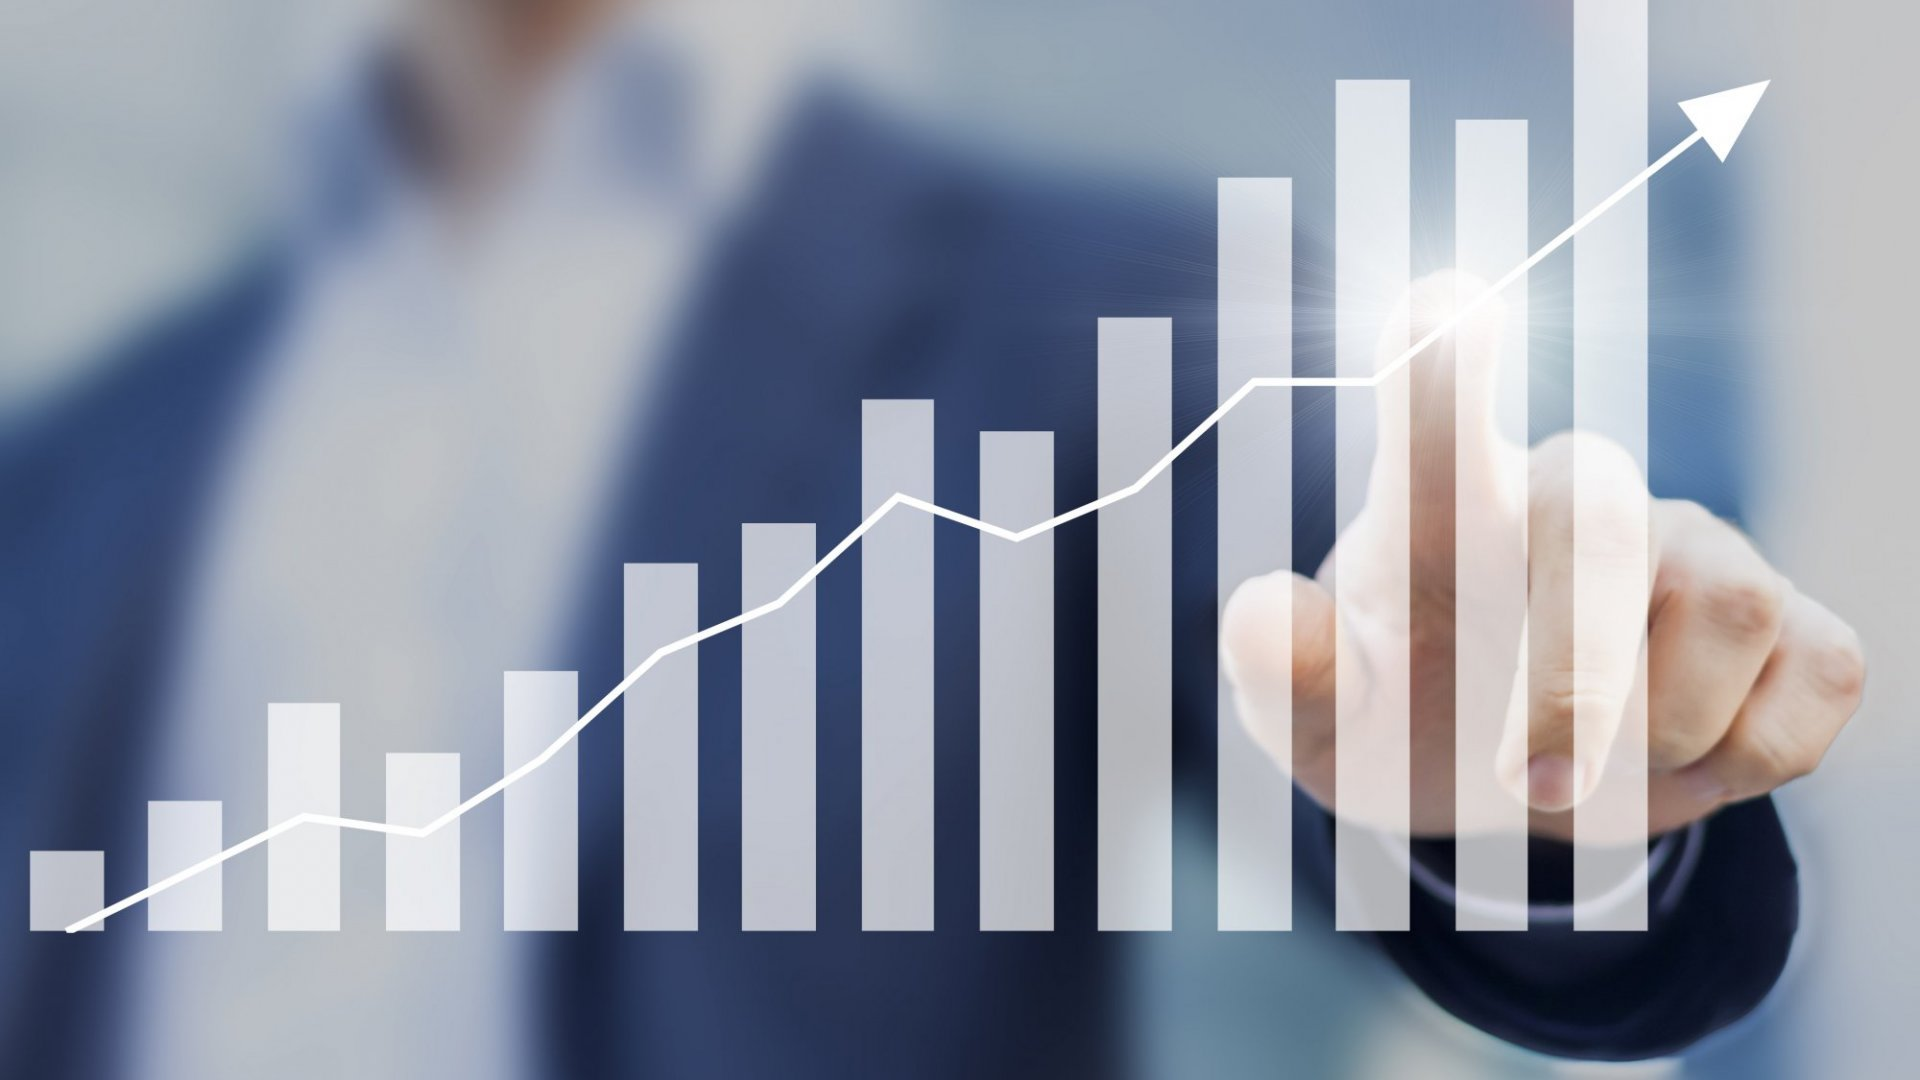

Problem ⁉

1. Predicting the Sales values for the next week using XGBoost. 
2. What is the months in which the highest sales value was achieved?
3. What is the best selling product ?
4. What is the month in which the highest sales value was achieved?


Solution : 


Importing Required libraries , cleaning data , handling time series data and preparing data by adding addtional columns representing specific values . 

In [1]:
# Importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as  sns 
from sklearn.preprocessing import MinMaxScaler
import glob
import datetime
plt.get_backend()
'TkAgg'
import xml.etree.ElementTree as ET
from xml.etree import ElementTree
import pandas as pd
from shapely.geometry import Point, Polygon
import os
%matplotlib inline

In [2]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read all the of the data files in one concatenated dataframe 
path = r'/content/drive/MyDrive/U'                     
all_files = glob.glob(os.path.join(path, "*.csv"))    
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


In [4]:
#print the first 10 rows of the concatenated dataframe
concatenated_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,27in FHD Monitor,1,149.99,01/17/21 18:16,"111 Church St, Portland, OR 97035"
1,141235,USB-C Charging Cable,1,11.95,01/24/21 20:06,"721 Highland St, New York City, NY 10001"
2,141236,Wired Headphones,1,11.99,01/04/21 19:31,"818 Maple St, New York City, NY 10001"
3,141237,Bose SoundSport Headphones,1,99.99,01/05/21 16:13,"831 5th St, Los Angeles, CA 90001"
4,141238,AAA Batteries (4-pack),2,2.99,01/03/21 19:22,"289 5th St, Boston, MA 02215"
5,141239,Apple Airpods Headphones,1,150.0,01/03/21 17:35,"495 Lincoln St, Los Angeles, CA 90001"
6,141240,Google Phone,1,600.0,01/17/21 19:15,"956 1st St, Los Angeles, CA 90001"
7,141241,AAA Batteries (4-pack),1,2.99,01/17/21 10:33,"954 Wilson St, Los Angeles, CA 90001"
8,141242,AA Batteries (4-pack),1,3.84,01/18/21 19:18,"978 Forest St, Atlanta, GA 30301"
9,141243,AA Batteries (4-pack),1,3.84,01/28/21 17:39,"134 Hill St, Dallas, TX 75001"


In [5]:
#removing white spaces from 'Order date ' column 
concatenated_df['Order Date'].str.strip()

0          01/17/21 18:16
1          01/24/21 20:06
2          01/04/21 19:31
3          01/05/21 16:13
4          01/03/21 19:22
               ...       
368930    02/02/2020 0:12
368931    02/04/2020 0:41
368932     02/24/20 16:52
368933     02/21/20 14:14
368934     02/28/20 13:45
Name: Order Date, Length: 368935, dtype: object

In [6]:
#print the data type of the 'Order Date' column 
concatenated_df['Order Date'].dtype

dtype('O')

In [68]:
concatenated_df['Order Date'] = concatenated_df['Order Date'].str.replace('/','-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
concatenated_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,27in FHD Monitor,1,149.99,01-17-21 18:16,"111 Church St, Portland, OR 97035"
1,141235,USB-C Charging Cable,1,11.95,01-24-21 20:06,"721 Highland St, New York City, NY 10001"
2,141236,Wired Headphones,1,11.99,01-04-21 19:31,"818 Maple St, New York City, NY 10001"
3,141237,Bose SoundSport Headphones,1,99.99,01-05-21 16:13,"831 5th St, Los Angeles, CA 90001"
4,141238,AAA Batteries (4-pack),2,2.99,01-03-21 19:22,"289 5th St, Boston, MA 02215"


In [9]:
#adding a new column to the concatenated dataframe with the date format  
concatenated_df['date_format'] = pd.to_datetime(concatenated_df['Order Date'], errors='coerce').dt.strftime('%m-%d-%Y %H:%M')
concatenated_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format
0,141234,27in FHD Monitor,1,149.99,01-17-21 18:16,"111 Church St, Portland, OR 97035",01-17-2021 18:16
1,141235,USB-C Charging Cable,1,11.95,01-24-21 20:06,"721 Highland St, New York City, NY 10001",01-24-2021 20:06
2,141236,Wired Headphones,1,11.99,01-04-21 19:31,"818 Maple St, New York City, NY 10001",01-04-2021 19:31
3,141237,Bose SoundSport Headphones,1,99.99,01-05-21 16:13,"831 5th St, Los Angeles, CA 90001",01-05-2021 16:13
4,141238,AAA Batteries (4-pack),2,2.99,01-03-21 19:22,"289 5th St, Boston, MA 02215",01-03-2021 19:22


In [10]:
#Sorting values from 'date_format' column : started from 1-1-2020 to 12-31-2021
concatenated_df.sort_values(by='date_format', inplace=True)
concatenated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format
345485,143379,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36
345486,143379,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36
348563,146317,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33
346438,144296,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38
354059,151554,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46
...,...,...,...,...,...,...,...
367886,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaN
368022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368320,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#check the number of null values 
concatenated_df.isnull().sum()

Order ID            1078
Product             1078
Quantity Ordered    1078
Price Each          1078
Order Date          1078
Purchase Address    1078
date_format         1725
dtype: int64

In [12]:
#drop null values 
concatenated_df=concatenated_df.dropna()

In [13]:
#recheck the number of null values 
concatenated_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
date_format         0
dtype: int64

In [14]:
concatenated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format
345485,143379,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36
345486,143379,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36
348563,146317,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33
346438,144296,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38
354059,151554,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46
...,...,...,...,...,...,...,...
171513,305073,Google Phone,1,600,12-31-21 23:44,"580 Lincoln St, Austin, TX 73301",12-31-2021 23:44
152782,287187,AA Batteries (4-pack),2,3.84,12-31-21 23:51,"671 Church St, New York City, NY 10001",12-31-2021 23:51
164191,298077,Bose SoundSport Headphones,1,99.99,12-31-21 23:58,"474 5th St, Boston, MA 02215",12-31-2021 23:58
172254,305784,USB-C Charging Cable,1,11.95,12-31-21 23:58,"9 Willow St, Seattle, WA 98101",12-31-2021 23:58


In [15]:
# add new column 'order_price ' represents the * between ' Price Each' and ' Quantity Ordered 
concatenated_df['order_price']=concatenated_df['Quantity Ordered'].astype(float)*concatenated_df['Price Each'].astype(float)
concatenated_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format,order_price
345485,143379,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,300.00
345486,143379,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,600.00
348563,146317,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33,999.99
346438,144296,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38,3.84
354059,151554,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46,600.00
...,...,...,...,...,...,...,...,...
171513,305073,Google Phone,1,600,12-31-21 23:44,"580 Lincoln St, Austin, TX 73301",12-31-2021 23:44,600.00
152782,287187,AA Batteries (4-pack),2,3.84,12-31-21 23:51,"671 Church St, New York City, NY 10001",12-31-2021 23:51,7.68
164191,298077,Bose SoundSport Headphones,1,99.99,12-31-21 23:58,"474 5th St, Boston, MA 02215",12-31-2021 23:58,99.99
172254,305784,USB-C Charging Cable,1,11.95,12-31-21 23:58,"9 Willow St, Seattle, WA 98101",12-31-2021 23:58,11.95


Problem 1 : Implementing Machine learning for predicting the sales volume over the next week 


In [16]:
date_price_df=concatenated_df.drop(columns=['Order ID', 'Product','Quantity Ordered','Price Each','Order Date','Purchase Address'])
date_price_df

,date_format,order_price
345485,01-01-2020 03:36,300.00
345486,01-01-2020 03:36,600.00
348563,01-01-2020 04:33,999.99
346438,01-01-2020 04:38,3.84
354059,01-01-2020 04:46,600.00
...,...,...
171513,12-31-2021 23:44,600.00
152782,12-31-2021 23:51,7.68
164191,12-31-2021 23:58,99.99
172254,12-31-2021 23:58,11.95


In [17]:
#group oreder price by week 
date_price_df['date_format'] = pd.to_datetime(date_price_df['date_format'])
date_price_df= date_price_df.set_index('date_format') 
weekly_df = date_price_df.resample('W').sum()
monthly_df = date_price_df.resample('M').sum()

In [18]:
weekly_df

,order_price
date_format,
2020-01-05,514672.56
2020-01-12,732790.50
2020-01-19,727474.59
2020-01-26,790832.53
2020-02-02,637415.29
...,...
2021-12-05,954053.75
2021-12-12,985629.84
2021-12-19,1025904.23


In [19]:
weekly_df2=weekly_df[['order_price']].copy()

In [20]:
#Converting to supervised problem by adding new column 'target ' 
weekly_df2['target']=weekly_df2.shift(-1)

In [21]:
weekly_df2.head()

,order_price,target
date_format,,
2020-01-05,514672.56,732790.50
2020-01-12,732790.50,727474.59
2020-01-19,727474.59,790832.53
2020-01-26,790832.53,637415.29
2020-02-02,637415.29,392037.84


In [22]:
weekly_df2.dropna(inplace=True)

In [23]:
#defininf a function for splitting data into training data and testing data
def train_test_split(data,perc):
    data = data.values
    n=int(len(data)*(1 - perc))
    return data[:n], data[n:]

In [24]:
#train test split 
train, test = train_test_split(weekly_df2,0.2)

In [25]:
# check the length of the train and test sets 
print(len(weekly_df2))
print(len(train))
print(len(test))

104
83
21


In [26]:
#labeling training data 
x = train[:, :-1]
y = train[:, -1]

In [27]:
# fitting XGBoost 
from xgboost import XGBRegressor
week_model = XGBRegressor(objective='reg:squarederror' , n_estimators=1000)
week_model.fit(x, y)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [28]:
# get a sample of the test set 
test[10]

array([536115.65, 499197.63])

In [29]:
#define predicting function 
from xgboost import XGBRegressor
def week_predict(train, val):
    train=np.array(train)
    x, y = train[:, :-1], train[:,-1]
    #week_model = XGBRegressor(max_depth=7, learning_rate=0.2, n_estimators=100, verbosity=1, silent=None)
    #week_model.fit(x,y)
    val = np.array(val).reshape(1,-1)
    pred = week_model.predict(val)
    return pred[0]

In [30]:
from sklearn.metrics import mean_squared_error
def validate(data, perc):
    predictions = []
    train, test = train_test_split(data, perc)
    history = [x for x in train]
    for i in range (len(test)):
        test_x, test_y= test[i, :-1], test[i,-1]
        
        pred= week_predict(history, test_x[0])
        
        predictions.append(pred)
        
        history.append(test[i])
        
    error = mean_squared_error(test[:,-1], predictions, squared=False)
    return error, test[:, -1], predictions

In [31]:
rmse, y , pred = validate(weekly_df2,0.2)

In [32]:
print(rmse)

139604.28910228706


In [33]:
import pickle 


#saving week_model 
pickle.dump(week_model,open('week_model.pkl','wb'))
#loading week model 
week_loaded_model=pickle.load(open('week_model.pkl','rb'))
#predicting the sales value of the next week by giving the current week sales 
week_loaded_model.predict(536115.65)

array([605486.5], dtype=float32)

Problem 2 :What is the month in which the highest sales value was achieved?

In [34]:
monthly_df

,order_price
date_format,
2020-01-31,3312479.79
2020-02-29,1482570.66
2020-03-31,1134524.50
2020-04-30,2454881.58
2020-05-31,2970592.84
2020-06-30,2672838.79
2020-07-31,2870645.49
2020-08-31,1352567.89
2020-09-30,4347741.22


In [35]:
print(len(monthly_df))

25


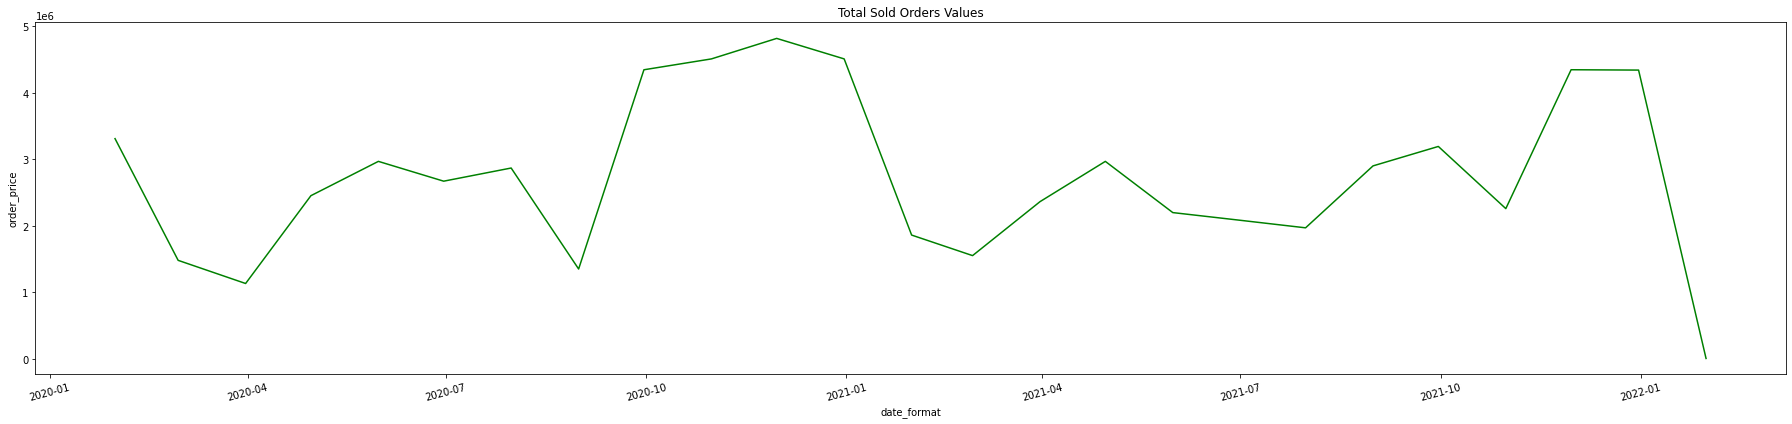

In [36]:
plt.rcParams["figure.figsize"] = [25,6]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x="date_format", y="order_price", data=monthly_df, color='green')
plt.xticks(rotation=15)
plt.title('Total Sold Orders Values')
plt.show()

In [37]:
product_df=concatenated_df.drop(columns=['Order ID'])

In [38]:
product_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format,order_price
345485,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,300.00
345486,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,600.00
348563,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33,999.99
346438,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38,3.84
354059,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46,600.00
...,...,...,...,...,...,...,...
171513,Google Phone,1,600,12-31-21 23:44,"580 Lincoln St, Austin, TX 73301",12-31-2021 23:44,600.00
152782,AA Batteries (4-pack),2,3.84,12-31-21 23:51,"671 Church St, New York City, NY 10001",12-31-2021 23:51,7.68
164191,Bose SoundSport Headphones,1,99.99,12-31-21 23:58,"474 5th St, Boston, MA 02215",12-31-2021 23:58,99.99
172254,USB-C Charging Cable,1,11.95,12-31-21 23:58,"9 Willow St, Seattle, WA 98101",12-31-2021 23:58,11.95


In [39]:
product_df['Product'].astype(str)

345485                 Flatscreen TV
345486                  Google Phone
348563               ThinkPad Laptop
346438         AA Batteries (4-pack)
354059                  Google Phone
                     ...            
171513                  Google Phone
152782         AA Batteries (4-pack)
164191    Bose SoundSport Headphones
172254          USB-C Charging Cable
155633        AAA Batteries (4-pack)
Name: Product, Length: 367210, dtype: object

In [40]:
from itertools import product
products=product_df['Product'].unique()
for product in products :
  print(product)

print(len(products))

Flatscreen TV
Google Phone
ThinkPad Laptop
AA Batteries (4-pack)
Wired Headphones
Vareebadd Phone
AAA Batteries (4-pack)
Lightning Charging Cable
USB-C Charging Cable
iPhone
20in Monitor
27in FHD Monitor
Bose SoundSport Headphones
34in Ultrawide Monitor
LG Dryer
Apple Airpods Headphones
Macbook Pro Laptop
27in 4K Gaming Monitor
LG Washing Machine
19


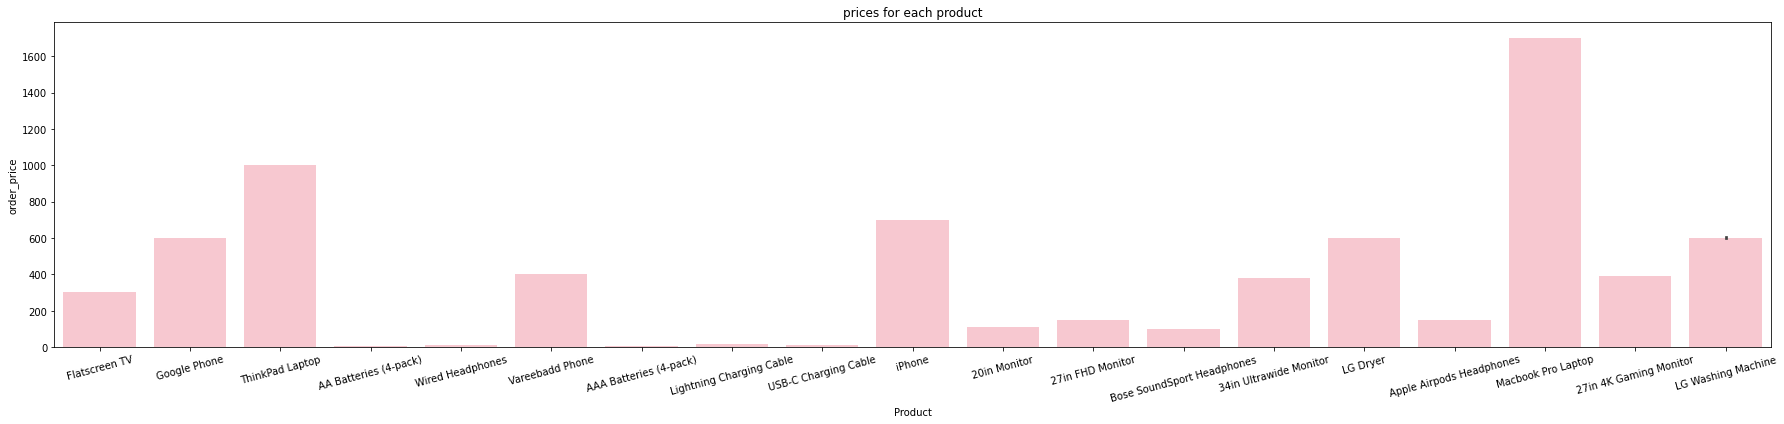

In [44]:
#checking prices for each product 
plt.rcParams["figure.figsize"] = [25,6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x="Product", y="order_price", data=product_df, color='pink')
plt.xticks(rotation=15)
plt.title('prices for each product')
plt.show()

In [46]:
product_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format,order_price
345485,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,300.00
345486,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,600.00
348563,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33,999.99
346438,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38,3.84
354059,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46,600.00
...,...,...,...,...,...,...,...
171513,Google Phone,1,600,12-31-21 23:44,"580 Lincoln St, Austin, TX 73301",12-31-2021 23:44,600.00
152782,AA Batteries (4-pack),2,3.84,12-31-21 23:51,"671 Church St, New York City, NY 10001",12-31-2021 23:51,7.68
164191,Bose SoundSport Headphones,1,99.99,12-31-21 23:58,"474 5th St, Boston, MA 02215",12-31-2021 23:58,99.99
172254,USB-C Charging Cable,1,11.95,12-31-21 23:58,"9 Willow St, Seattle, WA 98101",12-31-2021 23:58,11.95


Problem 3 : What is the best selling product ?


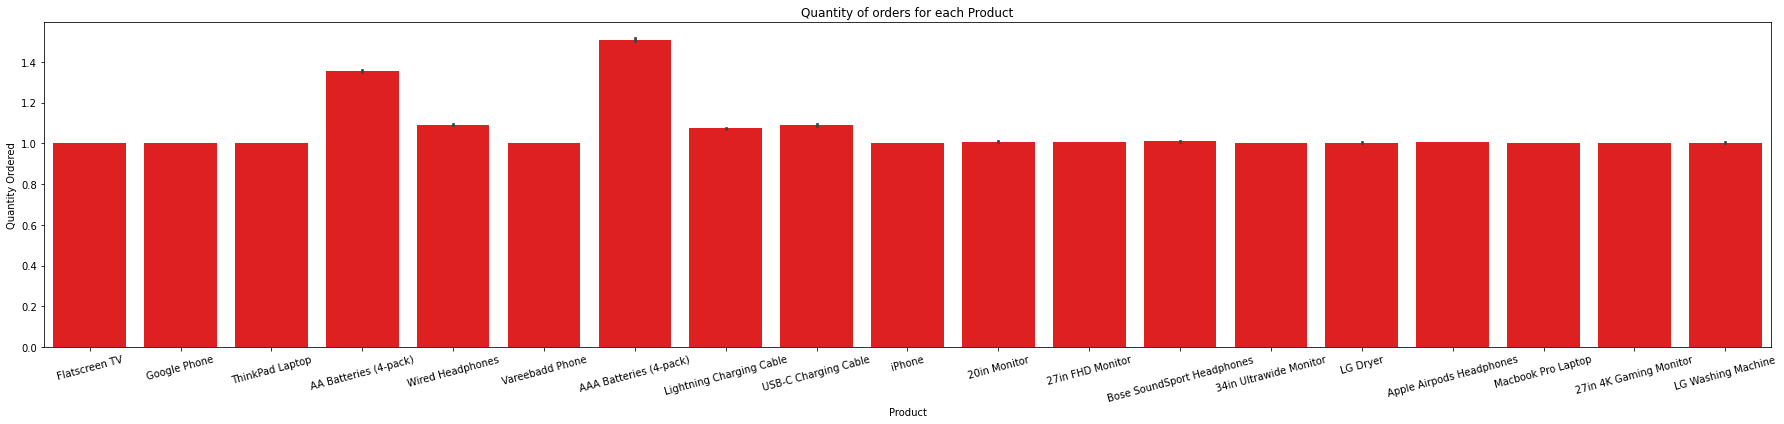

In [50]:
#checking best selling product
product_df['Quantity Ordered']=product_df['Quantity Ordered'].astype(int)
plt.rcParams["figure.figsize"] = [25,6]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x="Product", y="Quantity Ordered", data=product_df, color='red')
plt.xticks(rotation=15)
plt.title('Quantity of orders for each Product')
plt.show()

Problem 4 : What is the month in which the highest sales value was achieved?

In [51]:
#sales grouped by cities 
concatenated_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format,order_price
345485,143379,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,300.00
345486,143379,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,600.00
348563,146317,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33,999.99
346438,144296,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38,3.84
354059,151554,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46,600.00


In [53]:
#Adding column represents the city 
def get_city_name(address):
  return address.split(',')[1]

concatenated_df['city'] = concatenated_df['Purchase Address'].apply(lambda x: get_city_name(x))
concatenated_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,date_format,order_price,city
345485,143379,Flatscreen TV,1,300,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,300.00,New York City
345486,143379,Google Phone,1,600,01-01-2020 3:36,"195 Cedar St, New York City, NY 10001",01-01-2020 03:36,600.00,New York City
348563,146317,ThinkPad Laptop,1,999.99,01-01-2020 4:33,"481 South St, San Francisco, CA 94016",01-01-2020 04:33,999.99,San Francisco
346438,144296,AA Batteries (4-pack),1,3.84,01-01-2020 4:38,"856 14th St, Atlanta, GA 30301",01-01-2020 04:38,3.84,Atlanta
354059,151554,Google Phone,1,600,01-01-2020 4:46,"925 Main St, San Francisco, CA 94016",01-01-2020 04:46,600.00,San Francisco


In [66]:
results2 = concatenated_df.groupby('city').sum()
results2

,Quantity Ordered,order_price
city,,
Atlanta,33077,1.996005e+12
Austin,21924,1.328486e+12
Boston,43967,2.668983e+12
Dallas,32815,1.991569e+12
Los Angeles,66474,4.024219e+12
New York City,55078,3.342984e+12
Portland,27553,1.673369e+12
San Francisco,99744,6.030051e+12
Seattle,33009,2.002556e+12


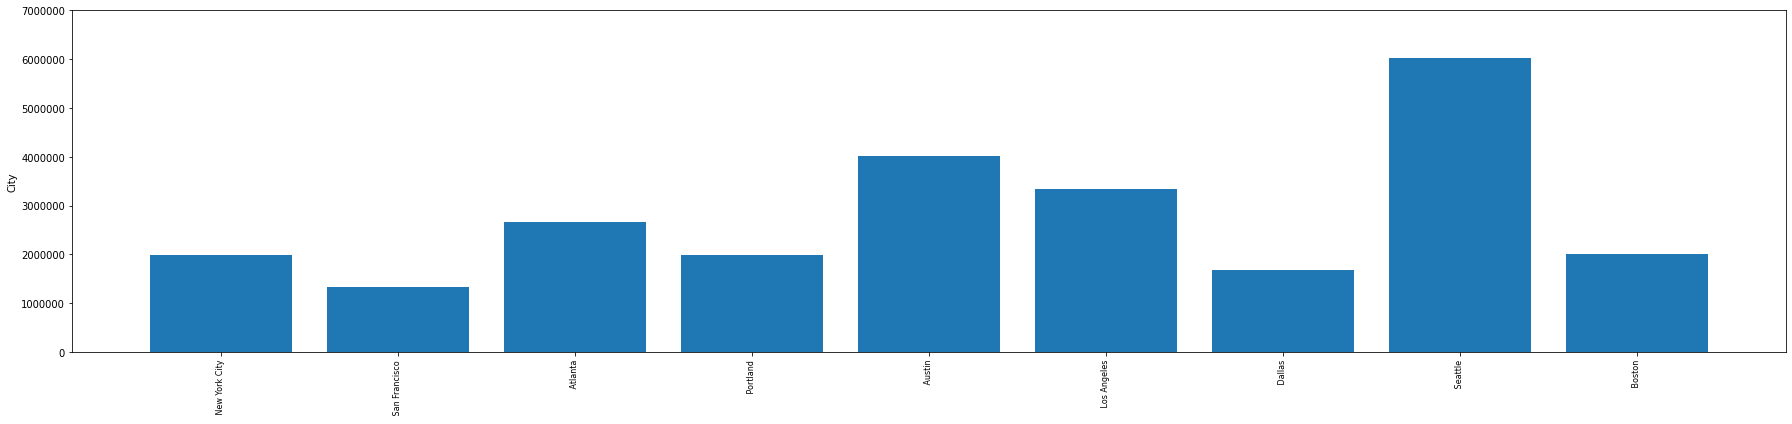

In [67]:
cities = concatenated_df['city'].unique()
plt.bar(cities, results2['order_price'])
plt.xticks(cities, rotation='vertical',size=8)
labels, location = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.ylabel('Sales in million $')
plt.ylabel('City')
plt.show()

Conclusions :

*   XgBoost can be used in timeseries forcasting by converting the problem to supervised problem this is going to be helpful if your device is low-end device 
*   The month in which the highest sales value was achieved was 12-2020 


*   AAA Batteries(4 pack) is the most sold product. Because it’s cheaper than other products and has high demand.
*   Seattle is the city with the highest sales.



